In [97]:
import pandas as pd
import re
import numpy as np

## Accessing Datasets

In [98]:
df1=pd.read_csv('breakfast.csv',)
df2=pd.read_csv('lunch.csv')
df3=pd.read_csv('dessert.csv')
df4=pd.read_csv('drinks.csv')
df5=pd.read_csv('appetizers.csv')
df6=pd.read_csv('soup.csv')
df7=pd.read_csv('dinner.csv')
df8=pd.read_csv('salads.csv')

In [99]:
df1.head(4)

,Unnamed: 0,Recipe_Name,Type,Serving,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Prepare time,cooking time,Total_Time,Ratings
0,0,Protein Waffles,cottage cheese,2.0,8.5,4.5,12.0,121.0,81.0,224.5,1.5,1.5,10.0,5.0,15 mins,4.90
1,1,Deviled Eggs,appetizer,2.0,6.3,7.5,1.0,96.8,187.0,156.1,NaN,0.3,10.0,15.0,25 mins,4.78
2,2,Crustless Quiche,dinner,1.0,20.0,12.5,5.0,215.0,193.0,620.0,1.0,2.5,15.0,40.0,55 mins,4.88
3,3,Spanish Tortilla with Pimenton Aioli,appetizer,1.0,9.0,14.5,21.5,247.0,188.0,363.5,2.0,2.5,15.0,NaN,1 hr 15 mins,4.44


## Creating final  Dataframe

In [100]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1349 non-null   int64  
 1   Recipe_Name   1349 non-null   object 
 2   Type          1276 non-null   object 
 3   Serving       1311 non-null   float64
 4   Protein       1322 non-null   float64
 5   Fat           1302 non-null   float64
 6   Carbs         1323 non-null   float64
 7   Calories      1331 non-null   float64
 8   cholesterol   948 non-null    float64
 9   sodium        1263 non-null   float64
 10  fiber         1248 non-null   float64
 11  sugar         1227 non-null   float64
 12  Prepare time  1216 non-null   float64
 13  cooking time  1070 non-null   float64
 14  Total_Time    1284 non-null   object 
 15  Ratings       1266 non-null   float64
dtypes: float64(12), int64(1), object(3)
memory usage: 168.8+ KB


In [101]:
#df.to_csv("NutriCook.csv")

In [102]:
df=pd.read_csv('NutriCook.csv')
df

,Unnamed: 0.1,Unnamed: 0,Recipe_Name,Type,Serving,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Prepare time,cooking time,Total_Time,Ratings
0,0,0,Protein Waffles,cottage cheese,2.0,8.5,4.5,12.0,121.0,81.0,224.5,1.5,1.5,10.0,5.0,15 mins,4.90
1,1,1,Deviled Eggs,appetizer,2.0,6.3,7.5,1.0,96.8,187.0,156.1,NaN,0.3,10.0,15.0,25 mins,4.78
2,2,2,Crustless Quiche,dinner,1.0,20.0,12.5,5.0,215.0,193.0,620.0,1.0,2.5,15.0,40.0,55 mins,4.88
3,3,3,Spanish Tortilla with Pimenton Aioli,appetizer,1.0,9.0,14.5,21.5,247.0,188.0,363.5,2.0,2.5,15.0,NaN,1 hr 15 mins,4.44
4,4,4,Corned Beef Hash,breakfast,1.0,14.5,16.0,26.0,300.0,62.5,782.5,3.5,6.5,10.0,15.0,25 mins,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,1344,190,Pan Seared Scallops with Baby Greens and Citru...,lunch,1.0,20.5,9.5,8.5,212.0,42.5,206.5,1.5,4.0,NaN,NaN,NaN,5.00
1345,1345,191,Broccoli and Cauliflower Salad with Capers in ...,NaN,1.0,3.2,7.0,7.6,97.0,NaN,121.5,3.5,NaN,NaN,NaN,20 mins,NaN
1346,1346,192,Autumn Salad with Pears and Gorgonzola,Lunch,1.0,4.5,12.5,10.5,160.5,NaN,NaN,2.0,2.0,5.0,NaN,5 mins,5.00
1347,1347,193,Grilled Zucchini and Tomato Salad – 0 pts,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Handling missing values

In [103]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)#index_col=0 also be used

In [104]:
#.drop(['Prepare time','cooking time'],axis=1,inplace =True)

In [108]:
df.isna().any()

Recipe_Name     False
Type             True
Serving          True
Protein          True
Fat              True
Carbs            True
Calories         True
cholesterol      True
sodium           True
fiber            True
sugar            True
Prepare time     True
cooking time     True
Total_Time       True
Ratings          True
dtype: bool

In [109]:
df.isna().sum()

Recipe_Name       0
Type             73
Serving          38
Protein          27
Fat              47
Carbs            26
Calories         18
cholesterol     401
sodium           86
fiber           101
sugar           122
Prepare time    133
cooking time    279
Total_Time       65
Ratings          83
dtype: int64

In [110]:
df.columns

Index(['Recipe_Name', 'Type', 'Serving', 'Protein', 'Fat', 'Carbs', 'Calories',
       'cholesterol', 'sodium', 'fiber', 'sugar', 'Prepare time',
       'cooking time', 'Total_Time', 'Ratings'],
      dtype='object')

In [111]:
name1=[]
for i in df['Recipe_Name']:
    name1.append(i)
len(name1)

1349

In [112]:
#removing subtext in brakets from list of text                                              #??????????????????????????
name2= [re.sub(r'\([^)]*\)', '', i).strip() for i in name1]
name2

['Protein Waffles',
 'Deviled Eggs',
 'Crustless Quiche',
 'Spanish Tortilla with Pimenton Aioli',
 'Corned Beef Hash',
 'Green Shakshuka',
 'Whole Wheat Irish Soda Bread Muffins',
 'High-Protein Egg Bagel',
 'Carrot Banana Protein Smoothie',
 'Chocolate Oat Flour Banana Bread',
 'Mushroom Toast',
 'Smoked Turkey Sausage Breakfast Skillet',
 'Breakfast Casserole with Spinach and Sausage',
 'Cheddar Biscuits',
 'Cornbread Muffins',
 'Pumpkin Bread Recipe',
 'Pumpkin Baked Oatmeal Cups',
 'Apple Turnover',
 'Classic Egg Salad',
 'Mini Pumpkin Chocolate Chip Muffins',
 'Banana Bread Recipe',
 'Cinnamon-Raisin Overnight Oats',
 'Mini Quiche',
 'Babka-Inspired Bagels',
 'Feta Eggs with Zucchini',
 'Zucchini Bread',
 'Loaded Egg Muffins',
 'Protein Bagels with Cottage Cheese',
 'Greek Cottage Cheese Bowl',
 'Broccoli and Cheese Egg Muffins',
 'English Muffin Breakfast Sandwich',
 '20+ High Protein Breakfast Ideas',
 'Roasted Strawberry Almond Flour Muffins',
 'Huevos Pericos',
 'Green Smooth

In [14]:
len(name2)
#name2

1349

In [15]:
#reassigning values of list name2 into Recipe_name column
df['Recipe_Name']=name2

In [16]:
df

,Unnamed: 0.1,Recipe_Name,Type,Serving,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Prepare time,cooking time,Total_Time,Ratings
0,0,Protein Waffles,cottage cheese,2.0,8.5,4.5,12.0,121.0,81.0,224.5,1.5,1.5,10.0,5.0,15 mins,4.90
1,1,Deviled Eggs,appetizer,2.0,6.3,7.5,1.0,96.8,187.0,156.1,NaN,0.3,10.0,15.0,25 mins,4.78
2,2,Crustless Quiche,dinner,1.0,20.0,12.5,5.0,215.0,193.0,620.0,1.0,2.5,15.0,40.0,55 mins,4.88
3,3,Spanish Tortilla with Pimenton Aioli,appetizer,1.0,9.0,14.5,21.5,247.0,188.0,363.5,2.0,2.5,15.0,NaN,1 hr 15 mins,4.44
4,4,Corned Beef Hash,breakfast,1.0,14.5,16.0,26.0,300.0,62.5,782.5,3.5,6.5,10.0,15.0,25 mins,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,1344,Pan Seared Scallops with Baby Greens and Citru...,lunch,1.0,20.5,9.5,8.5,212.0,42.5,206.5,1.5,4.0,NaN,NaN,NaN,5.00
1345,1345,Broccoli and Cauliflower Salad with Capers in ...,NaN,1.0,3.2,7.0,7.6,97.0,NaN,121.5,3.5,NaN,NaN,NaN,20 mins,NaN
1346,1346,Autumn Salad with Pears and Gorgonzola,Lunch,1.0,4.5,12.5,10.5,160.5,NaN,NaN,2.0,2.0,5.0,NaN,5 mins,5.00
1347,1347,Grilled Zucchini and Tomato Salad – 0 pts,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#removing duplicate values
df[df.duplicated()]

,Unnamed: 0.1,Recipe_Name,Type,Serving,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Prepare time,cooking time,Total_Time,Ratings


In [113]:
df=df.drop_duplicates()

In [114]:
df

,Recipe_Name,Type,Serving,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Prepare time,cooking time,Total_Time,Ratings
0,Protein Waffles,cottage cheese,2.0,8.5,4.5,12.0,121.0,81.0,224.5,1.5,1.5,10.0,5.0,15 mins,4.90
1,Deviled Eggs,appetizer,2.0,6.3,7.5,1.0,96.8,187.0,156.1,NaN,0.3,10.0,15.0,25 mins,4.78
2,Crustless Quiche,dinner,1.0,20.0,12.5,5.0,215.0,193.0,620.0,1.0,2.5,15.0,40.0,55 mins,4.88
3,Spanish Tortilla with Pimenton Aioli,appetizer,1.0,9.0,14.5,21.5,247.0,188.0,363.5,2.0,2.5,15.0,NaN,1 hr 15 mins,4.44
4,Corned Beef Hash,breakfast,1.0,14.5,16.0,26.0,300.0,62.5,782.5,3.5,6.5,10.0,15.0,25 mins,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,Pan Seared Scallops with Baby Greens and Citru...,lunch,1.0,20.5,9.5,8.5,212.0,42.5,206.5,1.5,4.0,NaN,NaN,NaN,5.00
1345,Broccoli and Cauliflower Salad with Capers in ...,NaN,1.0,3.2,7.0,7.6,97.0,NaN,121.5,3.5,NaN,NaN,NaN,20 mins,NaN
1346,Autumn Salad with Pears and Gorgonzola,Lunch,1.0,4.5,12.5,10.5,160.5,NaN,NaN,2.0,2.0,5.0,NaN,5 mins,5.00
1347,Grilled Zucchini and Tomato Salad – 0 pts,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
df.select_dtypes(include='float')

,Serving,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Prepare time,cooking time,Ratings
0,2.0,8.5,4.5,12.0,121.0,81.0,224.5,1.5,1.5,10.0,5.0,4.90
1,2.0,6.3,7.5,1.0,96.8,187.0,156.1,NaN,0.3,10.0,15.0,4.78
2,1.0,20.0,12.5,5.0,215.0,193.0,620.0,1.0,2.5,15.0,40.0,4.88
3,1.0,9.0,14.5,21.5,247.0,188.0,363.5,2.0,2.5,15.0,NaN,4.44
4,1.0,14.5,16.0,26.0,300.0,62.5,782.5,3.5,6.5,10.0,15.0,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...
1344,1.0,20.5,9.5,8.5,212.0,42.5,206.5,1.5,4.0,NaN,NaN,5.00
1345,1.0,3.2,7.0,7.6,97.0,NaN,121.5,3.5,NaN,NaN,NaN,NaN
1346,1.0,4.5,12.5,10.5,160.5,NaN,NaN,2.0,2.0,5.0,NaN,5.00
1347,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
df['Serving'].median()


1.0

In [117]:
df['Serving']=df['Serving'].fillna((df['Serving'].median()))
df.isna().any()

C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\2458912490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Serving']=df['Serving'].fillna((df['Serving'].median()))


Recipe_Name     False
Type             True
Serving         False
Protein          True
Fat              True
Carbs            True
Calories         True
cholesterol      True
sodium           True
fiber            True
sugar            True
Prepare time     True
cooking time     True
Total_Time       True
Ratings          True
dtype: bool

In [118]:
df['Serving']=df['Serving'].astype('int')

C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\2853328040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Serving']=df['Serving'].astype('int')


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 1348
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Recipe_Name   1100 non-null   object 
 1   Type          1028 non-null   object 
 2   Serving       1100 non-null   int32  
 3   Protein       1075 non-null   float64
 4   Fat           1055 non-null   float64
 5   Carbs         1077 non-null   float64
 6   Calories      1084 non-null   float64
 7   cholesterol   761 non-null    float64
 8   sodium        1023 non-null   float64
 9   fiber         1011 non-null   float64
 10  sugar         992 non-null    float64
 11  Prepare time  972 non-null    float64
 12  cooking time  856 non-null    float64
 13  Total_Time    1036 non-null   object 
 14  Ratings       1025 non-null   float64
dtypes: float64(11), int32(1), object(3)
memory usage: 133.2+ KB


In [120]:
df['Ratings'].mode()[0]

5.0

In [121]:
df["Calories"]=df['Calories'].fillna(df['Calories'].mode()[0])
df["cholesterol"]=df['cholesterol'].fillna(df['cholesterol'].mode()[0])
df["sodium"]=df['sodium'].fillna(df['sodium'].mode()[0])
df["fiber"]=df['fiber'].fillna(df['fiber'].mode()[0])
df["sugar"]=df['sugar'].fillna(df['sugar'].mode()[0])
df["Ratings"]=df['Ratings'].fillna(df['Ratings'].mode()[0])
df["Protein"]=df['Protein'].fillna(df['Protein'].mode()[0])
df["Carbs"]=df['Carbs'].fillna(df['Carbs'].mode()[0])
df["Fat"]=df['Fat'].fillna(df['Fat'].mode()[0])

C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\2150167167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Calories"]=df['Calories'].fillna(df['Calories'].mode()[0])
C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\2150167167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cholesterol"]=df['cholesterol'].fillna(df['cholesterol'].mode()[0])
C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\2150167167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [122]:
df.isna().sum()

Recipe_Name       0
Type             72
Serving           0
Protein           0
Fat               0
Carbs             0
Calories          0
cholesterol       0
sodium            0
fiber             0
sugar             0
Prepare time    128
cooking time    244
Total_Time       64
Ratings           0
dtype: int64

In [123]:
df["Total_Time"]=df['Total_Time'].fillna(df['Total_Time'].mode()[0])

C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\2728060417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total_Time"]=df['Total_Time'].fillna(df['Total_Time'].mode()[0])


In [124]:
df['Type'].unique()

array(['cottage cheese', 'appetizer', 'dinner', 'breakfast', 'Breakfast',
       'dessert', 'Cottage Cheese', 'snacks', 'lunch', 'Instant Pot',
       'Appetizer', 'Asparagus', 'Quinoa', 'Dinner', 'Rice Bowl',
       'cauliflower rice', 'burger', 'boneless chicken thighs',
       'Lettuce Wraps', 'rice bowl', 'quinoa', 'Lunch', nan,
       'lettuce wraps', 'canned tuna', 'Burger', 'Dessert', 'Snacks',
       'asparagus', 'Cauliflower Rice', 'instant pot', 'meatloaf',
       'Chicken Tenderloin', 'Meatloaf', 'Lettuce wraps', 'Canned Tuna'],
      dtype=object)

In [125]:
df['Type'] = ["Appetizer" if i=="appetizer"else i for i in df['Type']]

C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\30639524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = ["Appetizer" if i=="appetizer"else i for i in df['Type']]


In [126]:
df['Type'] = df['Type'].replace({'cottage cheese':'Cottage Cheese','dessert':'Dessert','meatloaf':'Meatloaf'})

C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\140155861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Type'].replace({'cottage cheese':'Cottage Cheese','dessert':'Dessert','meatloaf':'Meatloaf'})


In [127]:
df['Type'] = df['Type'].replace({'dinner':'Dinner','burger':'Burger','Lettuce wraps':'Lettuce Wraps','asparagus':'Asparagus'})

C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\2847860346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Type'].replace({'dinner':'Dinner','burger':'Burger','Lettuce wraps':'Lettuce Wraps','asparagus':'Asparagus'})


In [128]:
df['Type'] = df['Type'].replace({'rice bowl':'Rice Bowl','canned tuna':'Canned Tuna','quinoa':'Quinoa',
                                 'lettuce wraps':'Lettuce Wraps',
                                 'cauliflower rice':'Cauliflower Rice',
                                 'instant pot': 'Instant Pot'
                                
                                })

C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\2969555391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Type'].replace({'rice bowl':'Rice Bowl','canned tuna':'Canned Tuna','quinoa':'Quinoa',


In [129]:
df[df['Type']=='Instant Pot']# dinner

,Recipe_Name,Type,Serving,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Prepare time,cooking time,Total_Time,Ratings
64,Instant Pot Baked Oatmeal Bars,Instant Pot,1,9.0,6.5,45.0,266.0,5.0,61.0,8.0,11.0,10.0,50.0,1 hr,4.86
131,Instant Pot Steel Cut Oats,Instant Pot,1,7.0,3.0,50.5,235.0,5.0,26.0,6.5,15.0,5.0,20.0,25 mins,4.68
135,Instant Pot Deviled Eggs,Instant Pot,2,6.5,8.0,0.5,104.0,187.5,119.0,1.0,1.0,5.0,15.0,20 mins,4.29
154,Instant Pot Hard Boiled Eggs (and Soft Boiled),Instant Pot,1,6.0,5.0,0.5,78.0,186.0,62.0,1.0,0.5,NaN,10.0,10 mins,4.56
216,White Bean Pumpkin Turkey Chili (Slow Cooker o...,Instant Pot,1,32.0,2.5,31.0,272.5,5.0,499.0,12.0,2.5,5.0,NaN,4 hrs 5 mins,4.58
226,Instant Pot Chicken Noodle Soup,Instant Pot,1,26.5,6.5,13.5,223.0,117.0,775.0,1.4,3.0,15.0,35.0,50 mins,4.91
272,"Sweet Potato Soup with Sausage (Slow Cooker, I...",Instant Pot,1,23.5,8.5,23.0,265.0,66.0,1236.0,4.0,7.0,10.0,NaN,6 hrs 10 mins,4.93
325,"Quick Beef Chili Recipe (Stove, Slow Cooker or...",Instant Pot,1,31.5,7.0,22.5,312.0,71.0,629.5,8.5,2.5,10.0,30.0,40 mins,4.90
370,Instant Pot Braised Beef,Instant Pot,3,36.0,10.0,5.5,255.0,126.0,477.0,1.0,2.0,10.0,30.0,1 hr 40 mins,4.75
372,"Baby Greens with Goat Cheese, Beets and Candie...",Instant Pot,1,7.0,19.5,19.0,267.0,5.0,211.0,2.0,14.0,10.0,0.0,10 mins,4.86


In [130]:
df[df['Type']=='Asparagus']#lunch

,Recipe_Name,Type,Serving,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Prepare time,cooking time,Total_Time,Ratings
82,Asparagus and Swiss Cheese Frittata,Asparagus,1,19.0,15.0,9.0,243.0,259.0,386.0,1.0,3.0,10.0,30.0,40 mins,4.96
152,Asparagus and Lentils with Poached Egg,Asparagus,1,15.0,12.5,19.0,238.0,183.0,195.0,6.0,3.5,5.0,25.0,30 mins,5.00
161,Asparagus-Pancetta Potato Hash,Asparagus,3,12.0,9.0,22.0,217.0,196.0,531.0,4.0,1.0,10.0,20.0,30 mins,4.94
302,Lemon Asparagus Couscous Salad with Tomatoes,Asparagus,1,6.5,4.0,30.0,170.0,5.0,10.0,5.0,1.0,5.0,NaN,30 mins,4.78
356,Asparagus and Feta Tartlet with Phyllo Crust,Asparagus,1,4.5,5.0,7.5,91.0,73.5,170.0,0.5,1.5,15.0,35.0,50 mins,4.62
666,Vegetable Charcuterie Board,Asparagus,1,3.0,5.0,12.0,122.0,5.0,10.0,1.0,1.0,20.0,0.0,20 mins,5.00
731,Air Fryer Shishito Peppers,Asparagus,2,1.5,5.0,2.5,15.0,5.0,76.5,0.5,2.0,2.0,8.0,10 mins,5.00
733,Grilled Vegetable Platter with Yogurt Mint Sauce,Asparagus,1,11.0,9.5,21.0,196.0,6.5,167.5,6.0,10.0,15.0,10.0,25 mins,5.00
758,Asparagus and Caramelized Onion Tartlets,Asparagus,2,3.0,2.5,5.0,48.0,4.0,77.0,0.5,0.5,10.0,20.0,30 mins,5.00
837,Cream of Asparagus Soup,Asparagus,1,6.0,3.0,10.0,81.0,7.0,576.0,4.0,1.0,5.0,20.0,25 mins,4.83


In [131]:
df[df['Type']=='Quinoa']#breakfast

,Recipe_Name,Type,Serving,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Prepare time,cooking time,Total_Time,Ratings
168,Berry Quinoa Breakfast Bowls,Quinoa,1,6.0,4.5,47.0,240.0,5.0,95.0,6.0,23.0,NaN,NaN,30 mins,5.00
191,Summer Quinoa Breakfast Bowl,Quinoa,1,4.5,4.0,36.0,180.0,5.0,136.0,4.0,17.0,5.0,20.0,25 mins,5.00
257,Teriyaki Shrimp Quinoa Bowls with Mango-Cucumb...,Quinoa,1,24.0,10.0,44.5,352.0,143.0,1389.0,6.5,14.5,10.0,30.0,40 mins,5.00
268,Rainbow Quinoa Salad with Lemon Dressing,Quinoa,2,10.5,17.0,51.0,394.0,5.0,184.0,7.0,7.0,15.0,15.0,30 mins,4.62
280,Fish Taco Bowls,Quinoa,6,31.5,12.5,9.0,264.0,84.0,1084.0,3.0,3.5,5.0,10.0,15 mins,4.87
305,Avocado Quinoa Salad,Quinoa,1,11.0,23.0,55.0,443.0,5.0,174.0,16.0,9.5,5.0,20.0,25 mins,4.87
329,Cilantro Lime Chicken Breast (Grilled or Air F...,Quinoa,1,38.5,5.5,0.5,217.0,124.0,360.0,0.5,0.5,5.0,15.0,1 hr 20 mins,4.74
345,"Quinoa Salad with Kale, Cranberries and Mint",Quinoa,1,5.0,6.0,30.0,191.0,5.0,10.0,4.0,9.0,5.0,20.0,25 mins,5.00
352,Coconut-Poached Chicken with Bok Choy and Mush...,Quinoa,1,42.0,12.0,12.0,321.0,124.5,630.0,2.5,4.0,10.0,20.0,30 mins,4.56
369,Peanut-Braised Chicken Breasts,Quinoa,1,45.0,15.0,14.0,365.0,124.5,490.0,4.5,6.5,10.0,40.0,50 mins,4.55


In [132]:
df[df['Type']=='Rice Bowl']#lunch

,Recipe_Name,Type,Serving,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Prepare time,cooking time,Total_Time,Ratings
210,Korean-Inspired Salmon Rice Bowl,Rice Bowl,1,33.0,10.0,50.0,431.0,78.0,416.0,1.0,6.0,10.0,6.0,21 mins,4.92
252,"Honey Sriracha Roasted Salmon Rice Bowls (GF, DF)",Rice Bowl,1,38.5,17.5,48.0,506.0,93.5,489.0,5.0,10.5,20.0,10.0,30 mins,4.92
255,5-Minute Microwave Salmon Rice Bowl with Bok Choy,Rice Bowl,1,48.5,18.0,51.0,533.0,93.5,856.0,10.0,19.5,1.0,5.0,6 mins,5.00
304,Spicy Canned Salmon Rice Bowl,Rice Bowl,1,25.0,14.0,39.0,389.0,65.0,757.0,4.0,4.0,5.0,0.0,5 mins,4.89
378,Chicken Brown Rice Bowl (copycat Zinque’s Le B...,Rice Bowl,1,48.0,15.0,33.0,455.0,151.0,819.0,5.5,7.0,15.0,0.0,15 mins,4.93


In [133]:
df[df['Type']=='Cauliflower Rice']#lunch

,Recipe_Name,Type,Serving,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Prepare time,cooking time,Total_Time,Ratings
219,Chicken Nuggets,Cauliflower Rice,6,28.0,13.0,13.0,280.0,154.5,670.5,1.5,1.5,20.0,10.0,30 mins,4.92
228,Air Fryer Asian Meatballs,Cauliflower Rice,1,37.0,16.0,49.0,483.0,130.0,736.0,11.0,3.0,20.0,20.0,40 mins,4.75
330,Spicy Sriracha Tofu Rice Bowls (Air Fryer or O...,Cauliflower Rice,1,29.0,20.0,38.0,453.0,5.0,1109.0,6.5,6.5,15.0,15.0,30 mins,4.95
348,Salmon Fried Rice,Cauliflower Rice,1,34.0,17.5,28.0,408.0,248.5,733.0,4.0,2.5,5.0,20.0,25 mins,5.00
750,Cauliflower Rice (Arancini) Balls,Cauliflower Rice,3,21.5,11.5,15.6,257.0,95.5,644.0,3.0,2.5,5.0,25.0,30 mins,4.74
818,Southwest Turkey Meatballs,Cauliflower Rice,2,10.5,2.0,2.5,67.0,5.0,10.0,0.5,1.0,10.0,15.0,25 mins,5.00
975,Air Fryer Peanut Curry Tofu with Gingery Cauli...,Cauliflower Rice,1,30.0,29.0,24.0,453.0,5.0,981.0,8.5,9.0,10.0,20.0,40 mins,4.80
985,Pesto Salmon,Cauliflower Rice,1,30.0,17.0,2.0,290.0,83.5,230.0,1.0,0.5,2.0,6.0,14 mins,5.00
1044,Lentil Curry,Cauliflower Rice,1,13.0,1.0,41.0,216.0,5.0,294.0,8.0,7.0,10.0,30.0,40 mins,4.15
1087,Red Thai Coconut Curry Shrimp,Cauliflower Rice,1,16.0,5.0,5.0,136.0,143.0,1059.0,1.0,1.5,5.0,10.0,15 mins,4.82


In [134]:
df[df['Type']=='Burger'] #breakfast

,Recipe_Name,Type,Serving,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Prepare time,cooking time,Total_Time,Ratings
232,Chicken Burger,Burger,1,27.5,3.0,19.0,284.0,117.0,487.5,3.0,2.0,5.0,10.0,15 mins,4.92
237,Turkey Burger Recipe,Burger,1,29.0,12.0,33.5,351.0,84.0,768.5,2.0,8.5,10.0,15.0,25 mins,4.91
260,Broccoli Salad,Burger,1,6.5,11.5,11.0,171.0,8.5,279.0,2.0,6.0,5.0,10.0,15 mins,5.00
347,Cheeseburger Crunch Wrap,Burger,1,33.0,18.5,22.0,354.0,103.5,1282.5,10.0,1.5,5.0,15.0,20 mins,4.83
384,Spicy Pork Brussels Bowls,Burger,1,35.0,10.0,15.5,280.5,252.5,474.0,6.0,3.5,5.0,25.0,30 mins,4.85
386,Greek Turkey Burgers,Burger,1,29.0,14.5,2.5,255.0,111.0,360.0,0.5,1.0,15.0,15.0,30 mins,4.96
760,Burger Slider Skewers,Burger,1,8.0,2.5,1.5,66.0,20.0,293.5,0.5,0.5,20.0,10.0,30 mins,4.75
815,Baked Onion Rings,Burger,1,3.0,0.6,15.0,75.0,1.0,53.0,2.0,2.0,10.0,12.0,22 mins,3.50
1033,Smash Tacos,Burger,2,31.0,20.0,32.0,452.0,110.0,683.0,4.0,6.0,15.0,15.0,30 mins,4.63
1276,Cheeseburger Salad,Burger,1,28.0,17.0,11.5,311.0,79.0,417.0,4.0,4.5,10.0,10.0,20 mins,4.99


In [135]:
df[df['Type']=='boneless chicken thighs'] #dinner

,Recipe_Name,Type,Serving,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Prepare time,cooking time,Total_Time,Ratings
235,Chipotle Chicken,boneless chicken thighs,1,34.0,7.0,2.0,216.0,69.0,561.0,0.5,1.0,15.0,15.0,30 mins,5.00
671,Chicken Satay with Spicy Peanut Sauce,boneless chicken thighs,4,34.5,9.0,8.0,265.0,103.5,918.5,1.0,5.5,20.0,10.0,40 mins,4.87
902,Chicken Soup with Spinach and Whole Wheat Acin...,boneless chicken thighs,1,28.0,6.0,25.0,266.0,95.0,772.0,3.0,3.0,5.0,25.0,30 mins,4.95
978,White Chicken Chili,boneless chicken thighs,1,41.0,5.5,40.5,372.0,99.5,590.0,7.5,6.0,10.0,45.0,55 mins,4.74
1042,The Best Grilled Chicken Breast,boneless chicken thighs,2,51.0,12.5,1.5,339.0,165.5,523.5,0.5,1.0,5.0,6.0,41 mins,5.00
1047,Yogurt-Marinated Chicken,boneless chicken thighs,2,46.0,11.5,4.0,314.0,215.0,584.0,0.5,1.5,10.0,15.0,1 hr 25 mins,5.00
1138,Broiled or Grilled Pollo Sabroso,boneless chicken thighs,1,29.5,6.0,0.5,181.0,140.0,383.5,1.0,1.0,5.0,20.0,25 mins,4.97


In [136]:
df[df['Type']=='Lettuce Wraps'] #snacks

,Recipe_Name,Type,Serving,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Prepare time,cooking time,Total_Time,Ratings
247,5-Ingredient Salmon Salad (easy lunch idea),Lettuce Wraps,1,17.5,7.0,2.5,139.0,39.5,185.0,0.5,1.0,2.0,3.0,15 mins,4.71
269,Asian Chicken Lettuce Wraps,Lettuce Wraps,1,8.5,3.0,9.5,102.0,32.0,344.0,1.0,4.5,10.0,40.0,50 mins,5.00
300,Buffalo Chicken Salad,Lettuce Wraps,1,30.0,24.0,4.0,359.0,90.0,1401.5,1.0,2.5,5.0,0.0,5 mins,4.60
371,Shrimp Dumpling Lettuce Wraps or Rice Bowls,Lettuce Wraps,4,25.5,6.5,9.5,201.0,172.5,955.5,1.5,3.0,15.0,5.0,20 mins,4.76
1079,"Buffalo Chicken Lettuce Wraps (Slow Cooker, In...",Lettuce Wraps,1,25.0,0.1,5.2,147.5,5.0,879.0,1.5,1.5,5.0,NaN,4 hrs,4.59
1256,Chicken and Shrimp Laap (Larb),Lettuce Wraps,3,34.0,6.5,5.0,220.0,68.0,795.0,1.5,2.0,10.0,20.0,30 mins,5.00
1288,Asian Chicken Chopped Salad,Lettuce Wraps,1,24.0,18.0,23.0,332.0,96.0,585.0,4.0,7.0,NaN,NaN,15 mins,5.00
1289,Updated Waldorf Salad Cups,Lettuce Wraps,2,27.0,18.0,18.0,341.0,83.0,471.0,3.0,11.0,5.0,NaN,35 mins,5.00


In [137]:
df[df['Type']=='Canned Tuna']#snacks

,Recipe_Name,Type,Serving,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Prepare time,cooking time,Total_Time,Ratings
311,Tuna Croquettes (Baked or Air Fryer),Canned Tuna,2,22.5,3.5,21.5,215.0,69.0,426.5,1.5,1.5,10.0,40.0,1 hr,4.80
335,Cilantro Chicken Salad,Canned Tuna,1,23.0,6.0,3.0,160.5,61.5,151.5,0.5,1.0,10.0,0.0,15 mins,4.97
1312,Canned Tuna Ceviche,Canned Tuna,3,15.0,8.0,8.5,153.0,26.0,187.0,3.0,1.0,25.0,0.0,25 mins,4.92


In [138]:
df[df['Type']=='Meatloaf']#dinner

,Recipe_Name,Type,Serving,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Prepare time,cooking time,Total_Time,Ratings
1015,Turkey Meatloaf with Zucchini,Meatloaf,1,25.5,11.5,18.0,275.0,130.5,610.5,2.0,7.0,10.0,55.0,1 hr 10 mins,4.89
1118,Sweet Potato Turkey Meatloaf,Meatloaf,1,24.0,10.5,19.0,264.0,130.0,635.0,2.0,8.0,15.0,55.0,1 hr 15 mins,4.90


In [139]:
df[df['Type']=='Chicken Tenderloin']#lunch

,Recipe_Name,Type,Serving,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Prepare time,cooking time,Total_Time,Ratings
1078,Chicken Tenders Parmesan,Chicken Tenderloin,3,45.0,12.5,19.0,376.0,169.5,1188.0,2.0,4.5,5.0,30.0,35 mins,4.93


In [140]:
df['Type'] = df['Type'].replace({'Chicken Tenderloin':'Dinner',
                                 'Meatloaf':'Lunch',
                                 'Canned Tuna':'Appetizer',
                                 'Lettuce Wraps':'Appetizer',
                                 'boneless chicken thighs':'Dinner',
                                 'Burger': 'Breakfast',
                                 'Instant Pot':'Dinner',
                                 'Asparagus':'Lunch',
                                 'Quinoa':'Breakfast',
                                 'Rice Bowl':'Lunch',
                                 'Cauliflower Rice':'Lunch',
                                 'Cottage Cheese':'Breakfast',
                                 'lunch':"Lunch",
                                 'snacks':'Snacks',
                                 'breakfast':'Breakfast',
                                 'Snacks':'Breakfast',
                                 'Snacks':'Appetizer'
                                })

C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\1853919573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Type'].replace({'Chicken Tenderloin':'Dinner',


In [141]:
df[df['Type']=='Cottage Cheese']#breakfast

,Recipe_Name,Type,Serving,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Prepare time,cooking time,Total_Time,Ratings


In [142]:
df["Type"].unique()

array(['Breakfast', 'Appetizer', 'Dinner', 'Dessert', 'Snacks', 'Lunch',
       nan], dtype=object)

In [143]:
df['Type']=df['Type'].fillna(method='ffill')

C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\2819431413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type']=df['Type'].fillna(method='ffill')


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 1348
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Recipe_Name   1100 non-null   object 
 1   Type          1100 non-null   object 
 2   Serving       1100 non-null   int32  
 3   Protein       1100 non-null   float64
 4   Fat           1100 non-null   float64
 5   Carbs         1100 non-null   float64
 6   Calories      1100 non-null   float64
 7   cholesterol   1100 non-null   float64
 8   sodium        1100 non-null   float64
 9   fiber         1100 non-null   float64
 10  sugar         1100 non-null   float64
 11  Prepare time  972 non-null    float64
 12  cooking time  856 non-null    float64
 13  Total_Time    1100 non-null   object 
 14  Ratings       1100 non-null   float64
dtypes: float64(11), int32(1), object(3)
memory usage: 133.2+ KB


In [145]:
#df['Ratings']=round(df["Ratings"])

In [146]:
tt = []
for i in df['Total_Time']:
    minutes = 0
    a = re.findall(r'(\d+)\s*(hrs?|mins?)', i)
    for j, k in a:
        if k == 'hr':
            minutes += int(j) * 60
        else:
            minutes += int(j)
    tt.append(minutes)

df['Total_Time'] = tt

C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\1625469626.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Time'] = tt


In [147]:
df[df['Total_Time']<5]

,Recipe_Name,Type,Serving,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Prepare time,cooking time,Total_Time,Ratings
331,Sausage and Pepper Stromboli (Stuffed Sausage ...,Appetizer,1,12.5,5.5,43.5,272.0,20.5,671.0,1.5,1.0,10.0,50.0,2,5.00
394,Jamaican Beef Patties,Appetizer,1,11.5,4.5,25.0,191.0,29.0,412.0,2.0,1.0,30.0,30.0,2,3.96
455,Sweet Potato Pie,Dessert,1,3.5,6.5,38.0,208.0,41.0,135.0,2.0,15.0,NaN,NaN,2,4.85
463,No Bake Peanut Butter Pie,Dessert,1,2.5,10.0,30.0,215.0,5.0,83.0,1.0,15.0,10.0,NaN,3,4.72
487,Sprinkle Dipped Meringues,Dessert,2,1.0,2.0,15.5,85.0,2.0,15.0,1.0,5.0,25.0,NaN,3,5.00
497,Citrus Basil Mojito Pops,Dessert,1,3.0,5.0,8.0,34.0,5.0,1.0,1.0,7.0,5.0,NaN,4,5.00
511,Easter Egg Cake Pops,Dessert,1,1.5,4.0,15.0,102.5,2.0,68.0,1.0,7.0,40.0,20.0,2,5.00
513,St Patricks Day Cake Pops,Dessert,1,1.5,4.0,15.0,102.5,2.0,68.0,1.0,7.0,NaN,NaN,2,5.00
528,Raspberry Blueberry Gazpacho with Fresh Mint,Dessert,1,3.0,0.3,32.0,139.0,5.0,37.0,5.4,22.8,10.0,NaN,4,5.00
554,Meringue Ghosts,Dessert,1,0.4,0.3,6.1,27.5,5.0,6.4,0.1,5.9,30.0,30.0,2,5.00


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 1348
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Recipe_Name   1100 non-null   object 
 1   Type          1100 non-null   object 
 2   Serving       1100 non-null   int32  
 3   Protein       1100 non-null   float64
 4   Fat           1100 non-null   float64
 5   Carbs         1100 non-null   float64
 6   Calories      1100 non-null   float64
 7   cholesterol   1100 non-null   float64
 8   sodium        1100 non-null   float64
 9   fiber         1100 non-null   float64
 10  sugar         1100 non-null   float64
 11  Prepare time  972 non-null    float64
 12  cooking time  856 non-null    float64
 13  Total_Time    1100 non-null   int64  
 14  Ratings       1100 non-null   float64
dtypes: float64(11), int32(1), int64(1), object(2)
memory usage: 133.2+ KB


In [149]:
df['Type'].value_counts()

Type
Dinner       297
Breakfast    245
Lunch        214
Dessert      177
Appetizer    164
Snacks         3
Name: count, dtype: int64

In [150]:
df['Type'] = ["Appetizer" if i=="Snacks"else i for i in df['Type']]


C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\259729867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = ["Appetizer" if i=="Snacks"else i for i in df['Type']]


In [151]:
df['Type'] = df['Type'].replace({'Snacks':'Appetizer'})

C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\3554230753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Type'].replace({'Snacks':'Appetizer'})


In [152]:
df

,Recipe_Name,Type,Serving,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Prepare time,cooking time,Total_Time,Ratings
0,Protein Waffles,Breakfast,2,8.5,4.5,12.0,121.0,81.0,224.5,1.5,1.5,10.0,5.0,15,4.90
1,Deviled Eggs,Appetizer,2,6.3,7.5,1.0,96.8,187.0,156.1,1.0,0.3,10.0,15.0,25,4.78
2,Crustless Quiche,Dinner,1,20.0,12.5,5.0,215.0,193.0,620.0,1.0,2.5,15.0,40.0,55,4.88
3,Spanish Tortilla with Pimenton Aioli,Appetizer,1,9.0,14.5,21.5,247.0,188.0,363.5,2.0,2.5,15.0,NaN,75,4.44
4,Corned Beef Hash,Breakfast,1,14.5,16.0,26.0,300.0,62.5,782.5,3.5,6.5,10.0,15.0,25,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,Pan Seared Scallops with Baby Greens and Citru...,Lunch,1,20.5,9.5,8.5,212.0,42.5,206.5,1.5,4.0,NaN,NaN,30,5.00
1345,Broccoli and Cauliflower Salad with Capers in ...,Lunch,1,3.2,7.0,7.6,97.0,5.0,121.5,3.5,1.0,NaN,NaN,20,5.00
1346,Autumn Salad with Pears and Gorgonzola,Lunch,1,4.5,12.5,10.5,160.5,5.0,10.0,2.0,2.0,5.0,NaN,5,5.00
1347,Grilled Zucchini and Tomato Salad – 0 pts,Lunch,1,3.0,5.0,12.0,122.0,5.0,10.0,1.0,1.0,NaN,NaN,30,5.00


In [153]:
lst=["Protein",'Fat','Carbs','Calories','cholesterol','sodium','fiber','sugar']
for i in lst:
    df[i]=df[i]/df['Serving']
    
df

C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\789369743.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i]/df['Serving']


,Recipe_Name,Type,Serving,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Prepare time,cooking time,Total_Time,Ratings
0,Protein Waffles,Breakfast,2,4.25,2.25,6.0,60.5,40.5,112.25,0.75,0.75,10.0,5.0,15,4.90
1,Deviled Eggs,Appetizer,2,3.15,3.75,0.5,48.4,93.5,78.05,0.50,0.15,10.0,15.0,25,4.78
2,Crustless Quiche,Dinner,1,20.00,12.50,5.0,215.0,193.0,620.00,1.00,2.50,15.0,40.0,55,4.88
3,Spanish Tortilla with Pimenton Aioli,Appetizer,1,9.00,14.50,21.5,247.0,188.0,363.50,2.00,2.50,15.0,NaN,75,4.44
4,Corned Beef Hash,Breakfast,1,14.50,16.00,26.0,300.0,62.5,782.50,3.50,6.50,10.0,15.0,25,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,Pan Seared Scallops with Baby Greens and Citru...,Lunch,1,20.50,9.50,8.5,212.0,42.5,206.50,1.50,4.00,NaN,NaN,30,5.00
1345,Broccoli and Cauliflower Salad with Capers in ...,Lunch,1,3.20,7.00,7.6,97.0,5.0,121.50,3.50,1.00,NaN,NaN,20,5.00
1346,Autumn Salad with Pears and Gorgonzola,Lunch,1,4.50,12.50,10.5,160.5,5.0,10.00,2.00,2.00,5.0,NaN,5,5.00
1347,Grilled Zucchini and Tomato Salad – 0 pts,Lunch,1,3.00,5.00,12.0,122.0,5.0,10.00,1.00,1.00,NaN,NaN,30,5.00


In [154]:
df.drop('Serving',axis=1,inplace=True)

C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\2824191970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Serving',axis=1,inplace=True)


In [155]:
df.drop('Prepare time',axis=1,inplace=True)

C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\1652073378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Prepare time',axis=1,inplace=True)


In [156]:
#df[(df['Preparation Time'].isnull())& (df['Cooking Time'].isnull())]

In [157]:
df.drop('cooking time',axis=1,inplace=True)
#cooking time

C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\4229018653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('cooking time',axis=1,inplace=True)


In [158]:
#df.drop('Cooking Time',axis=1,inplace=True)

In [159]:
#df.drop(df[(df['Preparation Time'].isnull())& (df['Cooking Time'].isnull())].index,inplace=True)

In [160]:
#df[(df['Preparation Time'].isnull())& (df['Cooking Time'].isnull())]

In [161]:
# null_cooking_time = df['Cooking Time'].isnull()
# df.loc[null_cooking_time, 'Cooking Time'] = df.loc[null_cooking_time, 'Total Time'] - df.loc[null_cooking_time, 'Preparation Time']

In [162]:
df.isnull().sum()

Recipe_Name    0
Type           0
Protein        0
Fat            0
Carbs          0
Calories       0
cholesterol    0
sodium         0
fiber          0
sugar          0
Total_Time     0
Ratings        0
dtype: int64

In [163]:
#df['Cooking Time'].value_counts()

In [164]:
df

,Recipe_Name,Type,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Total_Time,Ratings
0,Protein Waffles,Breakfast,4.25,2.25,6.0,60.5,40.5,112.25,0.75,0.75,15,4.90
1,Deviled Eggs,Appetizer,3.15,3.75,0.5,48.4,93.5,78.05,0.50,0.15,25,4.78
2,Crustless Quiche,Dinner,20.00,12.50,5.0,215.0,193.0,620.00,1.00,2.50,55,4.88
3,Spanish Tortilla with Pimenton Aioli,Appetizer,9.00,14.50,21.5,247.0,188.0,363.50,2.00,2.50,75,4.44
4,Corned Beef Hash,Breakfast,14.50,16.00,26.0,300.0,62.5,782.50,3.50,6.50,25,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...
1344,Pan Seared Scallops with Baby Greens and Citru...,Lunch,20.50,9.50,8.5,212.0,42.5,206.50,1.50,4.00,30,5.00
1345,Broccoli and Cauliflower Salad with Capers in ...,Lunch,3.20,7.00,7.6,97.0,5.0,121.50,3.50,1.00,20,5.00
1346,Autumn Salad with Pears and Gorgonzola,Lunch,4.50,12.50,10.5,160.5,5.0,10.00,2.00,2.00,5,5.00
1347,Grilled Zucchini and Tomato Salad – 0 pts,Lunch,3.00,5.00,12.0,122.0,5.0,10.00,1.00,1.00,30,5.00


In [165]:
df["Type"].unique()

array(['Breakfast', 'Appetizer', 'Dinner', 'Dessert', 'Lunch'],
      dtype=object)

In [166]:
df


,Recipe_Name,Type,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Total_Time,Ratings
0,Protein Waffles,Breakfast,4.25,2.25,6.0,60.5,40.5,112.25,0.75,0.75,15,4.90
1,Deviled Eggs,Appetizer,3.15,3.75,0.5,48.4,93.5,78.05,0.50,0.15,25,4.78
2,Crustless Quiche,Dinner,20.00,12.50,5.0,215.0,193.0,620.00,1.00,2.50,55,4.88
3,Spanish Tortilla with Pimenton Aioli,Appetizer,9.00,14.50,21.5,247.0,188.0,363.50,2.00,2.50,75,4.44
4,Corned Beef Hash,Breakfast,14.50,16.00,26.0,300.0,62.5,782.50,3.50,6.50,25,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...
1344,Pan Seared Scallops with Baby Greens and Citru...,Lunch,20.50,9.50,8.5,212.0,42.5,206.50,1.50,4.00,30,5.00
1345,Broccoli and Cauliflower Salad with Capers in ...,Lunch,3.20,7.00,7.6,97.0,5.0,121.50,3.50,1.00,20,5.00
1346,Autumn Salad with Pears and Gorgonzola,Lunch,4.50,12.50,10.5,160.5,5.0,10.00,2.00,2.00,5,5.00
1347,Grilled Zucchini and Tomato Salad – 0 pts,Lunch,3.00,5.00,12.0,122.0,5.0,10.00,1.00,1.00,30,5.00


In [167]:
#df.iloc[1050:1100]
#drop these values
#31,218,814,808,818,897,1054

In [168]:
#df.to_csv("NutriCook1.csv")

## Outliers Treatment

In [169]:
#df[(df['Total Time']>ub)]

<Axes: ylabel='Protein'>

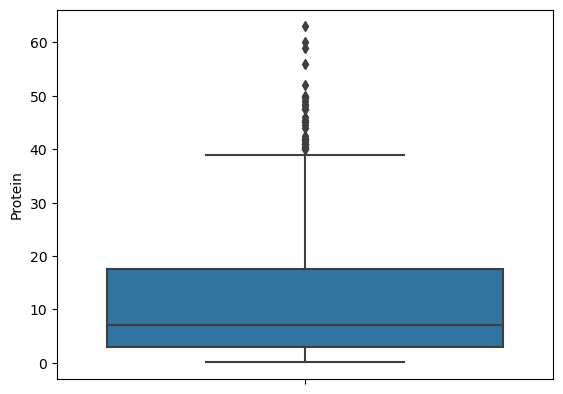

In [170]:
import seaborn as sns
sns.boxplot(y = df["Protein"])

In [171]:
df['Protein'] = df['Protein'].round(2)
df['Fat']=df['Fat'].round(2)
df['Carbs']=df['Carbs'].round(2)
df['Calories']=df['Calories'].round(2)
df['cholesterol']=df['cholesterol'].round(2)
df['Calories']=df['Calories'].round(2)
df['sodium']=df['sodium'].round(1)
df['fiber']=df['fiber'].round(2)
df['sugar']=df['sugar'].round(2)

C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\2819607800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Protein'] = df['Protein'].round(2)
C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\2819607800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fat']=df['Fat'].round(2)
C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_13908\2819607800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [176]:
#df.to_csv("NutriCook1.csv")

In [173]:
df['Type'].unique()

array(['Breakfast', 'Appetizer', 'Dinner', 'Dessert', 'Lunch'],
      dtype=object)

In [174]:
df['Protein'].unique()

array([ 4.25,  3.15, 20.  ,  9.  , 14.5 , 10.  ,  4.  , 28.5 ,  5.5 ,
        7.  , 22.5 , 22.  ,  8.  ,  2.1 ,  6.  ,  1.5 ,  9.5 ,  1.  ,
        3.  ,  5.  ,  8.75,  3.5 , 21.5 , 18.5 , 13.9 , 12.5 ,  6.5 ,
       18.  , 15.  , 24.  , 24.3 , 21.  , 31.  , 25.5 , 12.  ,  2.7 ,
       16.  , 29.  , 16.5 , 19.  , 11.  ,  2.  , 17.5 , 46.  , 11.5 ,
        4.5 , 11.25,  0.42, 25.  , 10.5 ,  0.5 ,  4.3 ,  3.1 , 13.  ,
       28.  ,  4.75, 13.5 ,  5.25,  2.5 , 14.  , 19.5 ,  0.25, 15.5 ,
       17.  ,  7.5 ,  3.25,  8.1 , 26.5 ,  3.38, 20.5 ,  3.33,  0.75,
       36.  , 30.  , 33.  , 14.33, 41.5 , 32.  , 38.5 ,  4.67, 30.5 ,
        9.25, 37.  , 24.5 , 27.5 , 45.  , 10.17, 34.  , 13.25, 16.75,
       29.6 ,  6.25, 48.5 ,  2.44, 42.  , 26.  , 49.5 ,  8.5 , 23.5 ,
       40.5 , 47.5 , 22.2 , 37.5 , 44.  , 15.17,  6.75, 13.7 ,  2.57,
       27.  , 32.5 , 31.5 , 45.5 ,  2.83, 23.  , 11.75, 35.  ,  6.88,
       24.25, 39.  , 33.5 ,  6.38, 41.  , 44.5 , 48.  , 31.75, 34.5 ,
        6.83, 49.  ,

In [175]:
df

,Recipe_Name,Type,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Total_Time,Ratings
0,Protein Waffles,Breakfast,4.25,2.25,6.0,60.5,40.5,112.2,0.75,0.75,15,4.90
1,Deviled Eggs,Appetizer,3.15,3.75,0.5,48.4,93.5,78.0,0.50,0.15,25,4.78
2,Crustless Quiche,Dinner,20.00,12.50,5.0,215.0,193.0,620.0,1.00,2.50,55,4.88
3,Spanish Tortilla with Pimenton Aioli,Appetizer,9.00,14.50,21.5,247.0,188.0,363.5,2.00,2.50,75,4.44
4,Corned Beef Hash,Breakfast,14.50,16.00,26.0,300.0,62.5,782.5,3.50,6.50,25,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...
1344,Pan Seared Scallops with Baby Greens and Citru...,Lunch,20.50,9.50,8.5,212.0,42.5,206.5,1.50,4.00,30,5.00
1345,Broccoli and Cauliflower Salad with Capers in ...,Lunch,3.20,7.00,7.6,97.0,5.0,121.5,3.50,1.00,20,5.00
1346,Autumn Salad with Pears and Gorgonzola,Lunch,4.50,12.50,10.5,160.5,5.0,10.0,2.00,2.00,5,5.00
1347,Grilled Zucchini and Tomato Salad – 0 pts,Lunch,3.00,5.00,12.0,122.0,5.0,10.0,1.00,1.00,30,5.00


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 1348
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recipe_Name  1100 non-null   object 
 1   Type         1100 non-null   object 
 2   Protein      1100 non-null   float64
 3   Fat          1100 non-null   float64
 4   Carbs        1100 non-null   float64
 5   Calories     1100 non-null   float64
 6   cholesterol  1100 non-null   float64
 7   sodium       1100 non-null   float64
 8   fiber        1100 non-null   float64
 9   sugar        1100 non-null   float64
 10  Total_Time   1100 non-null   int64  
 11  Ratings      1100 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 111.7+ KB
